<a href="https://colab.research.google.com/github/moises-rb/lab-aws-sagemaker-canvas-estoque/blob/main/lab_aws_sagemaker_canvas_estoque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💻 Estrutura do Notebook no Colab


In [ ]:
# 1. Instalação e Importação
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
# 2. Carregamento dos Dados (Passo 1 do Lab)
df = pd.read_csv('dataset-1000-com-preco-promocional-e-renovacao-estoque.csv')

In [ ]:
# 3. Lendo e conferindo as informações do dataset
df.head()

,ID_PRODUTO,DATA_EVENTO,PRECO,FLAG_PROMOCAO,QUANTIDADE_ESTOQUE
0,1000,2023-12-31,138.43,1,100
1,1001,2023-12-31,75.08,0,100
2,1002,2023-12-31,58.84,0,100
3,1003,2023-12-31,61.96,0,100
4,1004,2023-12-31,20.34,0,100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_PRODUTO          1000 non-null   int64  
 1   DATA_EVENTO         1000 non-null   object 
 2   PRECO               1000 non-null   float64
 3   FLAG_PROMOCAO       1000 non-null   int64  
 4   QUANTIDADE_ESTOQUE  1000 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB


In [ ]:
df['ID_PRODUTO'].nunique()

25

In [ ]:
# 1. Converter a data para o formato correto
df['DATA_EVENTO'] = pd.to_datetime(df['DATA_EVENTO'])

In [ ]:
# 2. Filtrar apenas UM produto para a previsão ser específica
# Vamos escolher o primeiro ID que aparece (1000)
df_produto = df[df['ID_PRODUTO'] == 1000].copy()

In [ ]:
# 3. Preparar para o Prophet (ds e y)
df_treino = df_produto[['DATA_EVENTO', 'QUANTIDADE_ESTOQUE']].rename(
    columns={'DATA_EVENTO': 'ds', 'QUANTIDADE_ESTOQUE': 'y'}
)

In [ ]:
# Criando o modelo
model = Prophet()

# Adicionando a promoção como informação extra (se o dataset permitir)
# Para simplificar agora, vamos focar no básico, mas saiba que isso é possível!
model.fit(df_treino)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


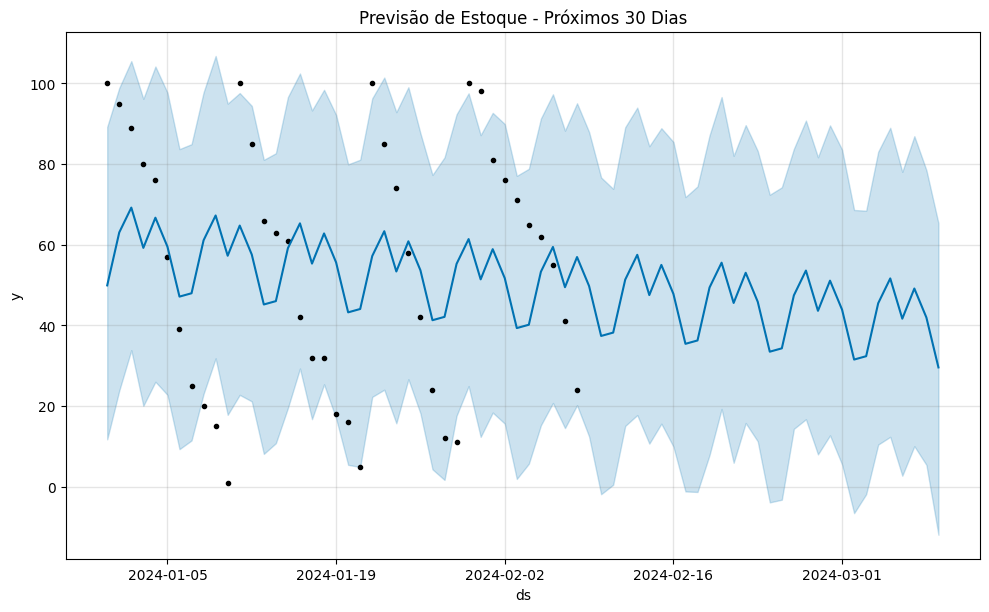

In [ ]:
# 1. Criar um dataframe com datas futuras (30 dias)
future = model.make_future_dataframe(periods=30)

# 2. Prever os valores
forecast = model.predict(future)

# 3. Visualizar o gráfico de previsão
fig1 = model.plot(forecast)
plt.title('Previsão de Estoque - Próximos 30 Dias')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

# Alinhando os dados reais com a previsão para calcular o erro
# Usamos apenas as datas que existem em ambos (histórico)
comparacao = forecast[['ds', 'yhat']].merge(df_treino[['ds', 'y']], on='ds', how='inner')

mae = mean_absolute_error(comparacao['y'], comparacao['yhat'])

print(f"--- ANÁLISE DE PERFORMANCE ---")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Isso significa que o modelo erra, em média, {mae:.2f} unidades por dia.")

--- ANÁLISE DE PERFORMANCE ---
Erro Médio Absoluto (MAE): 25.82
Isso significa que o modelo erra, em média, 25.82 unidades por dia.
